In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Isolation Forest

In [2]:
from sklearn.ensemble import IsolationForest

In [3]:
train=pd.read_csv('D:\\Data_sets\\anomaly\\train.csv')

In [4]:
train.head()

,x1,x2
0,2.739071,3.074363
1,3.212891,2.975792
2,2.675808,3.204330
3,2.644740,2.690809
4,2.964332,3.050357


In [5]:
train.shape

(2000, 2)

<AxesSubplot:xlabel='x1', ylabel='x2'>

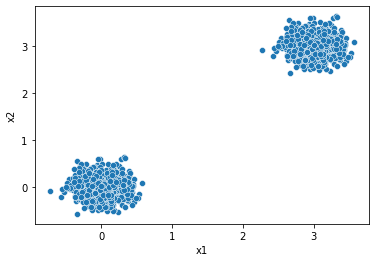

In [6]:
sns.scatterplot(x=train.x1, y=train.x2)

In [104]:
model=IsolationForest(contamination=0.02)

In [105]:
model.fit(train)

IsolationForest(contamination=0.02)

In [106]:
test=pd.read_csv('D:\\Data_sets\\anomaly\\test.csv')

In [107]:
test.shape

(450, 2)

<AxesSubplot:xlabel='x1', ylabel='x2'>

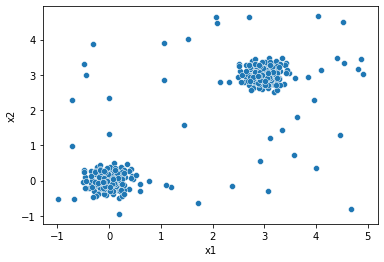

In [108]:
sns.scatterplot(x=test.x1, y=test.x2)

### 1 = Normal , -1 = Abnormal (Anomaly)

In [109]:
model.predict(test)

array([ 1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [110]:
# model.score_samples(test)

In [111]:
np.unique(model.predict(test), return_counts=True)

(array([-1,  1]), array([ 50, 400], dtype=int64))

<AxesSubplot:xlabel='x1', ylabel='x2'>

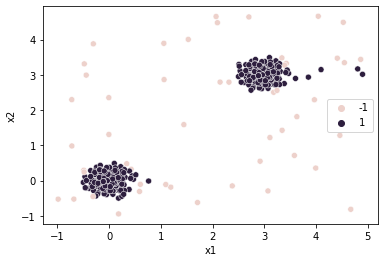

In [112]:
sns.scatterplot(x=test.x1, y=test.x2, hue=model.predict(test))
# sns.scatterplot(x=X_train[:,0], y=X_train[:,1])

### One Class SVM

In [43]:
from sklearn.svm import OneClassSVM

In [54]:
svm=OneClassSVM(nu=0.02)

In [55]:
svm.fit(train)

OneClassSVM(nu=0.02)

In [56]:
# svm.predict(test)

In [57]:
np.unique(svm.predict(test), return_counts=True)

(array([-1,  1], dtype=int64), array([ 53, 397], dtype=int64))

<AxesSubplot:xlabel='x1', ylabel='x2'>

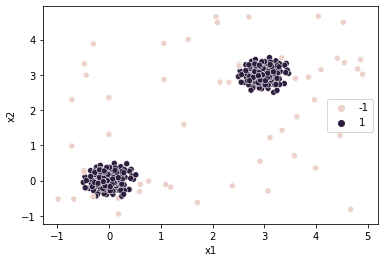

In [58]:
sns.scatterplot(x=test.x1, y=test.x2, hue=svm.predict(test))

### Local Outlier Fcator (LOF)

In [74]:
from sklearn.neighbors import LocalOutlierFactor

In [85]:
lof=LocalOutlierFactor(novelty=True)

In [87]:
lof.fit(train)

LocalOutlierFactor(novelty=True)

In [88]:
lof.predict(test)

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [93]:
np.unique(lof.predict(test), return_counts=True)

(array([-1,  1]), array([ 61, 389], dtype=int64))

<AxesSubplot:xlabel='x1', ylabel='x2'>

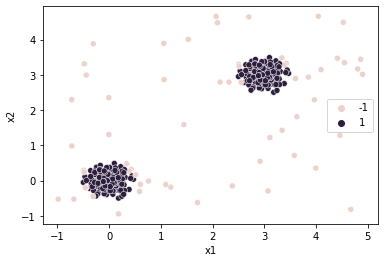

In [94]:
sns.scatterplot(x=test.x1, y=test.x2, hue=lof.predict(test))

In [117]:
# TEST DATASET CONTAINS 400 NORMAL , 50 ANOMALY

In [ ]:
# 1 N0RMAL, -1 ANOMALY

In [ ]:
(TP+TN) / (TP + FN + TN + FP)

In [116]:
(50+389) / ( 50+ 0 + 389+ 11 )

0.9755555555555555